# Pima indians - ***Solución propuesta por [Carlos Mazzaroli](https://deepnote.com/app/mazzaroli/Decision-Trees-y-Random-Forest-con-Python-y-scikit-learn-22e03409-93bd-4c7e-9ade-f94470cd6941)***

## ***Datasource***

Utilizaremos el dataset Pima indians diabetes de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

El conjunto de datos contiene información médica de mujeres Pima Indian de Arizona, Estados Unidos, que participaron en un estudio de la diabetes en la década de 1980.

El conjunto de datos consta de 768 instancias y 9 atributos, incluyendo el número de veces que una mujer ha estado embarazada, su edad, presión arterial diastólica, índice de masa corporal, concentración de glucosa en plasma y la presencia o ausencia de diabetes en la prueba.

***Atributos***

1. preg: Número de veces embarazada
2. plas: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
3. pres: Presión arterial diastólica (mm Hg)
4. skin: Grosor del pliegue cutáneo tricipital (mm)
5. test: Concentración de insulina en suero a las 2 horas (mu U/ml)
6. mass: Índice de masa corporal (peso en kg/(altura en m)^2)
7. pedi: Función de diabetes basada en antecedentes familiares
8. age: edad (años)
9. class: Variable de clase (1: positivo para diabetes, 0: negativo para diabetes en la prueba)

## ***Dataset***

In [10]:
# Importación de librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

# Carga del dataset
df_diabetes = pd.read_csv('pima-indians-diabetes.csv', header=None, sep=',')

df_columns = np.array(['preg','plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'Class'])

df_diabetes.columns = df_columns

### ***EDA***

In [11]:
# Visualización del DataFrame
df_diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Análisis del shape del objeto
df_diabetes.shape

(768, 9)

In [13]:
# Visualización de los tipos de datos
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   Class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


***Exploración de la variable target***

In [14]:
# Drop duplicates - no hay datos duplicados en el dataset
df_diabetes.drop_duplicates(inplace=True)
df_diabetes

,preg,plas,pres,skin,test,mass,pedi,age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


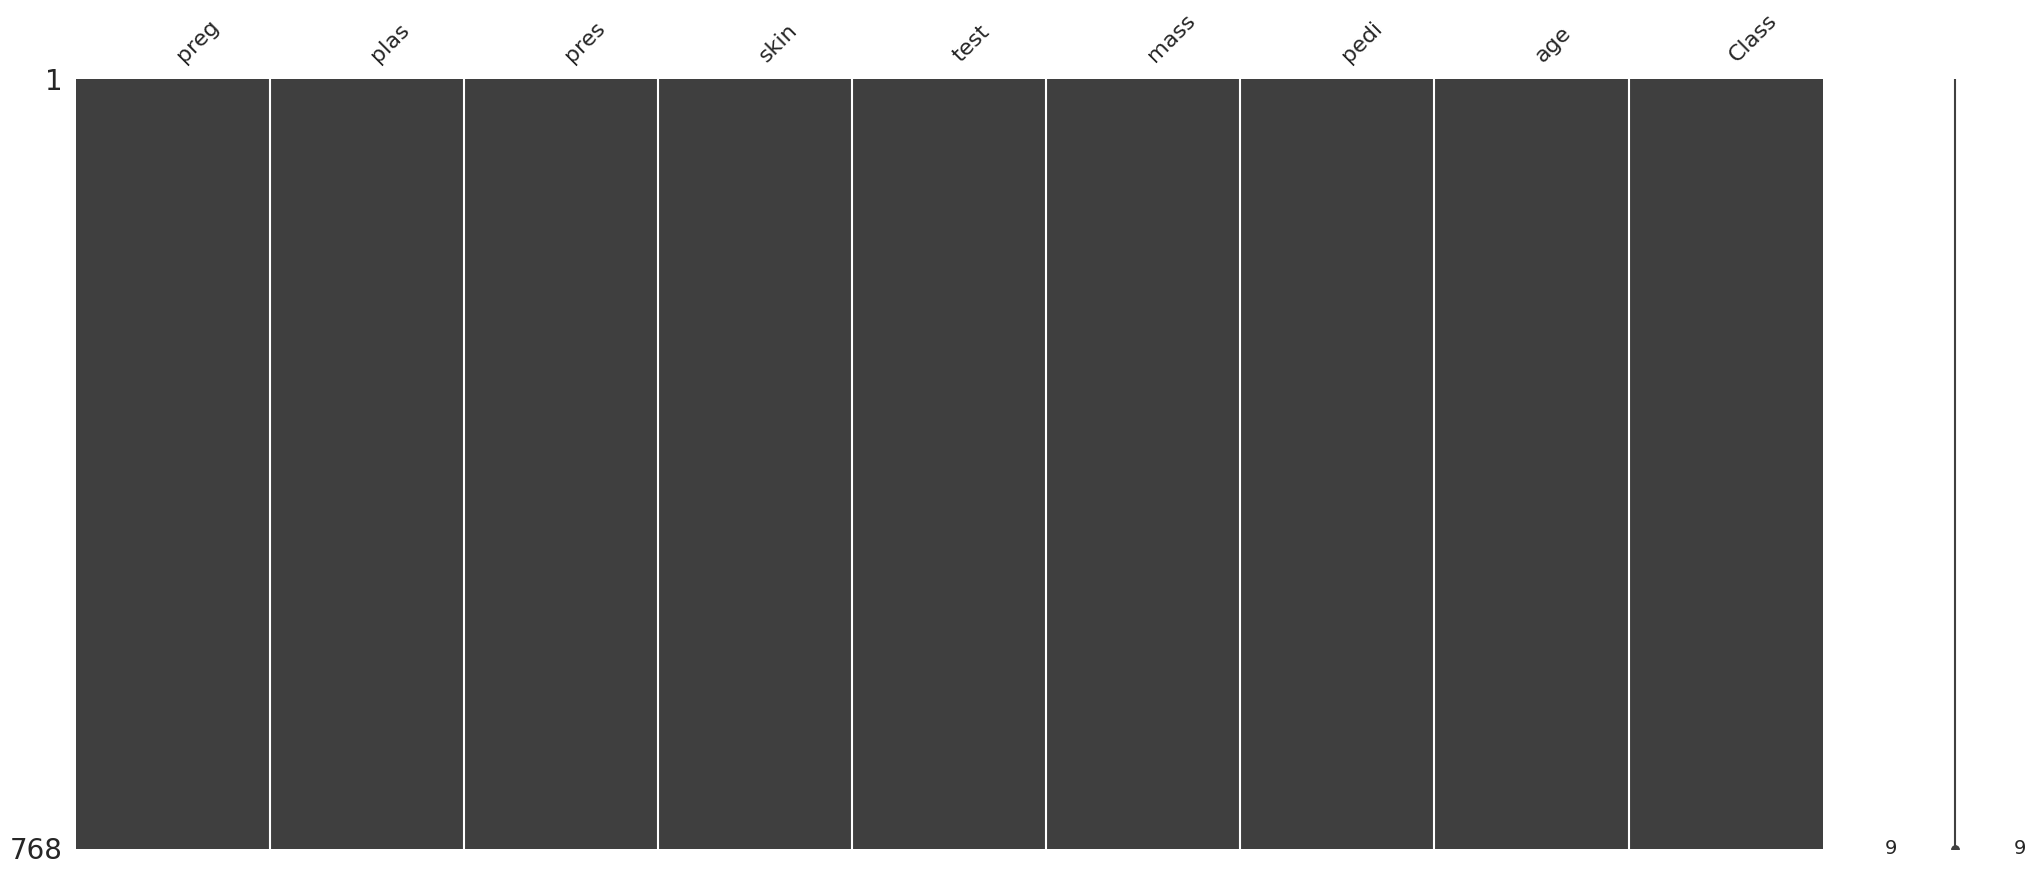

In [15]:
# Null values
import missingno as miss

miss.matrix(df_diabetes);

In [16]:
# Missing values
df_diabetes.iloc[:, 1:6].replace(to_replace=[0], value=np.nan).isna().sum().reset_index(name = 'missing_values').rename(columns={"index": "variable"}).assign( percentage = lambda df_reset: df_reset.missing_values / len(df_diabetes) * 100)

,variable,missing_values,percentage
0,plas,5,0.651042
1,pres,35,4.557292
2,skin,227,29.557292
3,test,374,48.697917
4,mass,11,1.432292


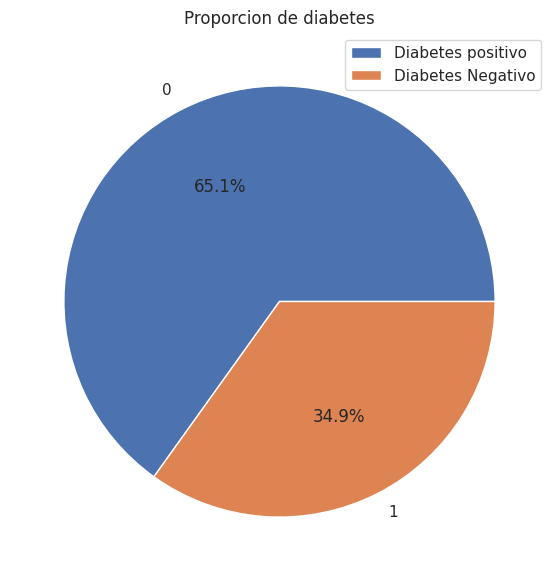

Class
0    500
1    268
Name: count, dtype: int64


In [17]:
# Proporción de la variable target
plt.figure(figsize=(7,7))

labels, counts = np.unique(df_diabetes.Class, return_counts=True)
plt.pie(counts, autopct='%1.1f%%',labels=labels)
plt.legend({'Diabetes Negativo','Diabetes positivo'})
plt.title('Proporcion de diabetes')

plt.show()

print(df_diabetes.Class.value_counts())

### ***Feature Engineering***

In [18]:
# Separación de datos en X e y (target & predictor variables)
X_diabetes = df_diabetes.drop('Class',axis=1)
y_diabetes = df_diabetes.Class

# Importamos las librerias para entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes,y_diabetes, test_size=.20, random_state=42)
X_train_diabetes.shape,y_train_diabetes.shape

((614, 8), (614,))

In [19]:
# Bosque aleatorio
from sklearn.ensemble import RandomForestClassifier

# Instancia del modelo
rfc_diabetes = RandomForestClassifier(random_state=42)

# Optimizacion de parametros
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'n_estimators': [10,25,50],
    'max_depth' : [5,10,15],
    'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,4],
}
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rfc_diabetes, param_grid=param_grid, cv=5, scoring='accuracy')
# Ajustar el modelo con GridSearchCV
grid_search.fit(X_train_diabetes, y_train_diabetes)

# Obtener el modelo con el mejor rendimiento
best_model_diabetes = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
810 fits failed out of a total of 2025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [20]:
# Mejores parametros del modelo
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [21]:
from sklearn.metrics import accuracy_score, classification_report
y_train_pred_diabetes = best_model_diabetes.predict(X_train_diabetes)
y_test_pred_diabetes = best_model_diabetes.predict(X_test_diabetes)

accuracy_train_diabetes = accuracy_score(y_train_diabetes,y_train_pred_diabetes)
accuracy_test_diabetes = accuracy_score(y_test_diabetes,y_test_pred_diabetes)
print(accuracy_train_diabetes)
print(accuracy_test_diabetes)

0.8501628664495114
0.7857142857142857


In [22]:
print(classification_report(y_test_diabetes, y_test_pred_diabetes))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154




El modelo de Random Forest, con parámetros optimizados, alcanzó una precisión general del 79% y un promedio ponderado del 76%.

El F1-score para la clase "0" fue de 84%, indicando una buena capacidad para identificar casos negativos. Sin embargo, el F1-score para la clase "1" fue de 68%, mostrando un rendimiento ligeramente inferior en la detección de casos positivos.

En general, el modelo demostró un rendimiento satisfactorio.

## ***Training***

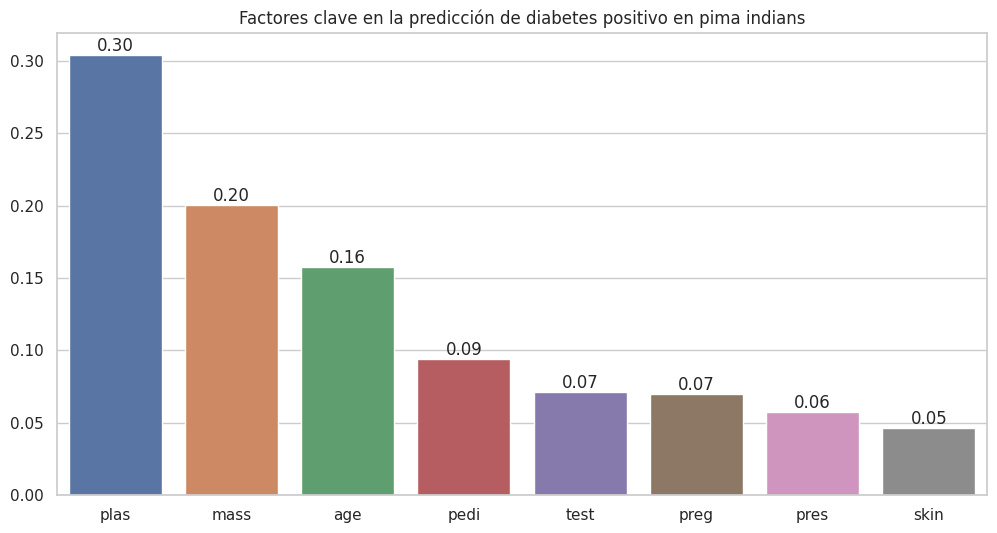

,0
plas,0.304330
mass,0.200533
age,0.157357
pedi,0.093927
test,0.070988
preg,0.069711
pres,0.057222
skin,0.045934


In [23]:
feature_scores_diabetes = pd.DataFrame(pd.Series(best_model_diabetes.feature_importances_, index=X_train_diabetes.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_diabetes)

for index, value in enumerate(feature_scores_diabetes.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de diabetes positivo en pima indians")
plt.show()
pd.DataFrame(feature_scores_diabetes).T

Un análisis de las importancias de las características revela que las características más influyentes para la predicción del modelo son:

* plas: Con una importancia de 0.304330, se destaca como la característica más importante. Esto indica que la concentración de glucosa en plasma sanguíneo tiene un impacto significativo en la predicción de la diabetes.

* mass: El índice de masa corporal (IMC) es la segunda característica más relevante, con una importancia de 0.200533. Esto sugiere que el peso relativo a la altura también juega un papel crucial en la predicción de la diabetes.

* age: La edad se posiciona como la tercera característica más importante, con una importancia de 0.157357. Esto indica que la edad de la paciente también contribuye significativamente a la predicción de la enfermedad.

* pedi: El valor de pedigree diabetes function (pedi) tiene una importancia de 0.093927. Esto sugiere que el historial familiar de diabetes puede tener un impacto en la predicción de la enfermedad.

Las características restantes, como test, preg, pres y skin tienen importancias relativamente más bajas en comparación con las anteriores, pero aún contribuyen al proceso de predicción.

Estos resultados resaltan la importancia de características clave como la concentración de glucosa, el índice de masa corporal, la edad y el historial familiar en la predicción de la diabetes en el conjunto de datos.

## ***Test & validation***

In [24]:
from sklearn.model_selection import cross_val_score, KFold

k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(best_model_diabetes, X_train_diabetes, y_train_diabetes, cv=cv, scoring='accuracy')
print("")
print("Accuracy scores for each fold:", scores*100)
print("Mean accuracy: ", scores.mean()*100)
print("Standard deviation: ", scores.std()*100)


Accuracy scores for each fold: [78.04878049 76.42276423 72.35772358 74.79674797 79.50819672]
Mean accuracy:  76.22684259629482
Standard deviation:  2.495611367618129


Los resultados muestran que el modelo tiene una precisión promedio del 76.23% en la validación cruzada, con una desviación estándar de 2.49%, lo que indica que las puntuaciones de precisión están relativamente cerca de la media y son consistentes entre los pliegues.

Esto sugiere que el modelo tiene un rendimiento razonablemente estable y generaliza bien en los diferentes pliegues de la validación cruzada.

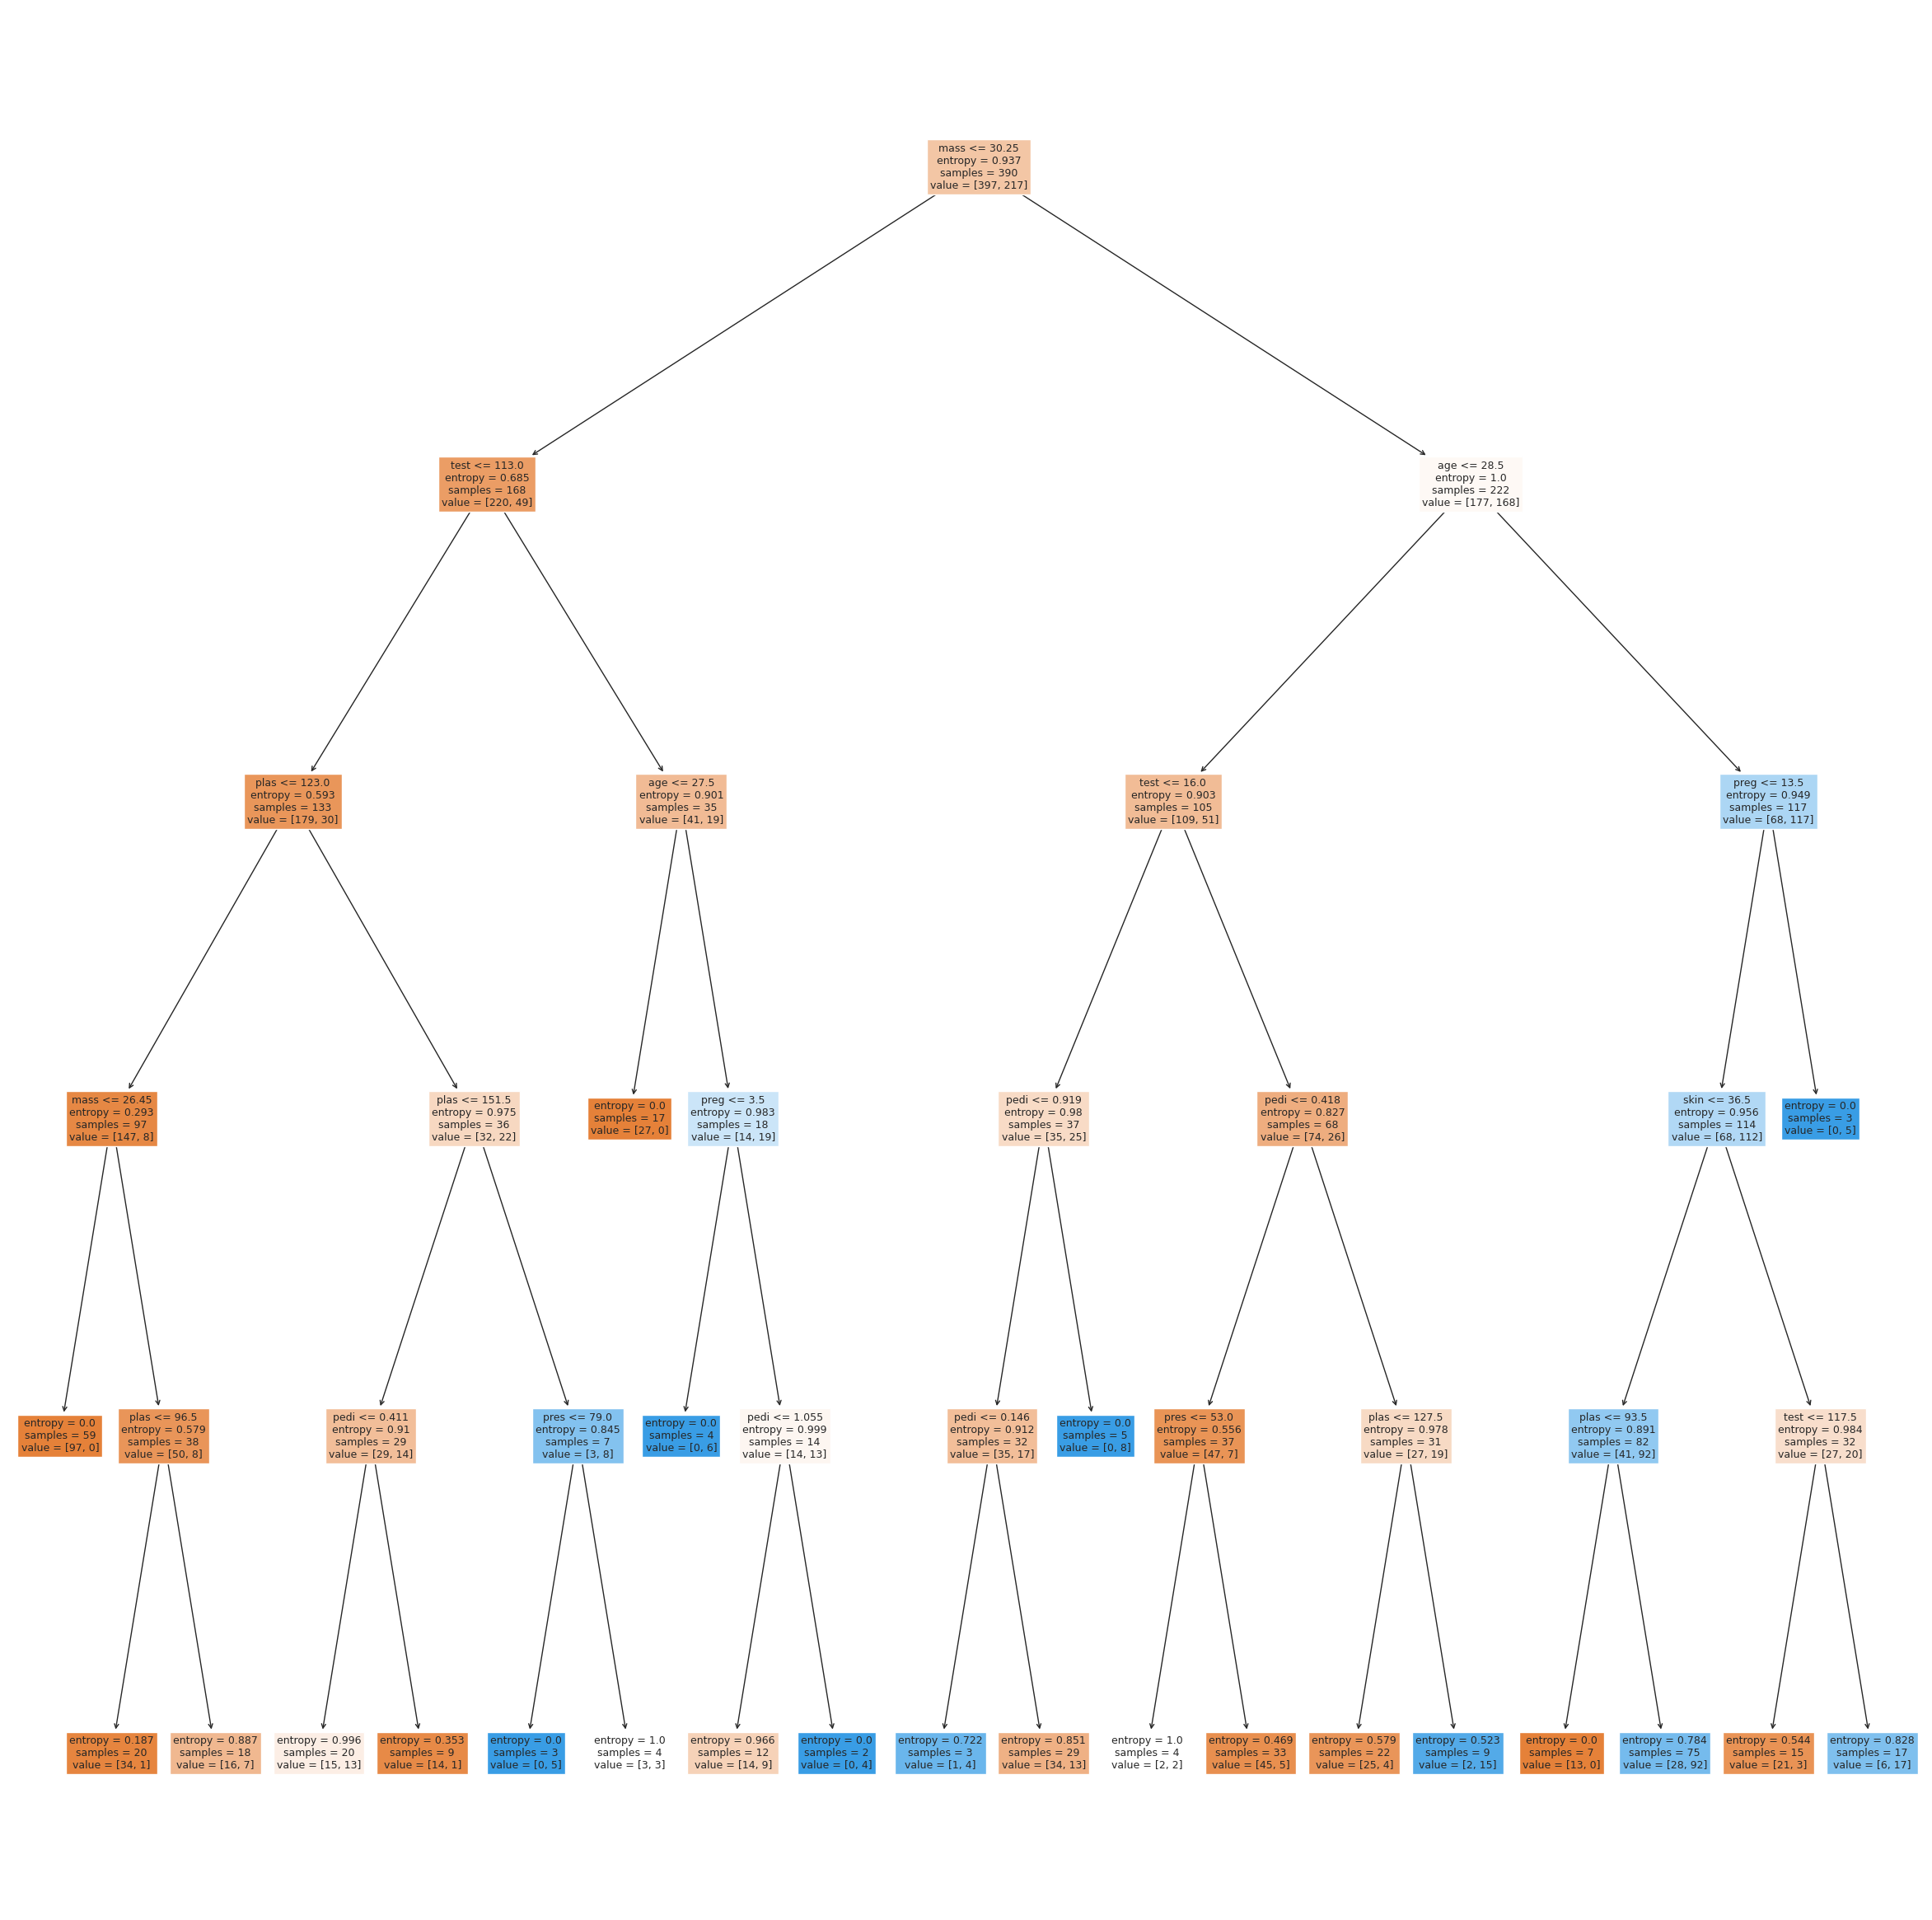

In [25]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(30, 30))

# Obtener un árbol aleatorio del Random Forest
tree_index = 0  # Índice del árbol deseado
Tree = best_model_diabetes.estimators_[tree_index]

# Visualizar el árbol utilizando plot_tree
tree.plot_tree(Tree, feature_names=X_train_diabetes.columns, filled=True)
plt.show()